In [4]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
import torch
%matplotlib inline

In [5]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [9]:
from PIL import Image

# ... (rest of your code)

url = "/content/maxresdefault.jpg"
image = Image.open(url).convert("RGB") # Convert image to RGB to remove alpha channel

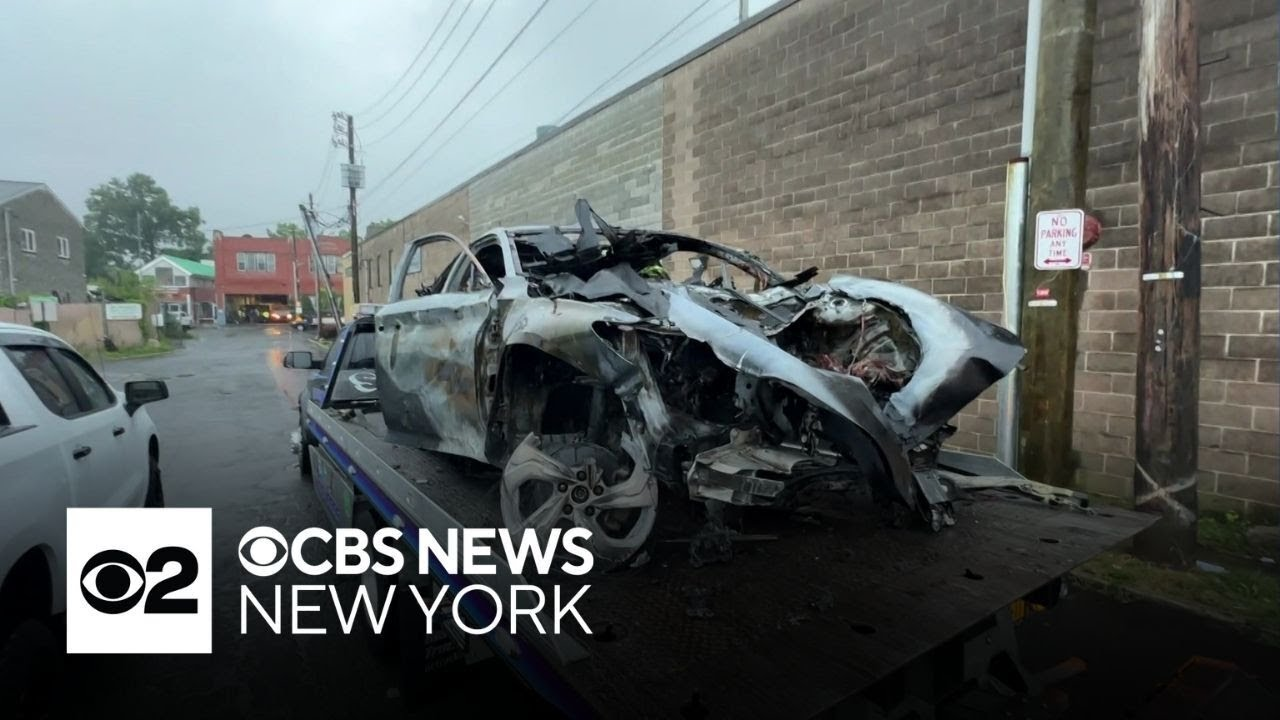

In [10]:
image

In [13]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': 'The image shows the aftermath of a car accident in New York City. The car appears to be severely damaged, with the front bumper and hood crumpled and the windshield shattered. The body of the car is lying on its side on a flatbed tow truck, with a brick building on the right side of the image. There are other cars parked on the street in the background. The sky is overcast and the overall mood of the scene is somber.'}

In [16]:
task_prompt = '<MORE_DETAILED_CAPTION>'
text_message = run_example(task_prompt)

In [17]:
# Import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

def analyze_sentiment(text):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Analyze the sentiment of the input text
    sentiment_scores = sia.polarity_scores(text)

    # Determine the overall sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Assuming you want to analyze the sentiment of the value associated with '<MORE_DETAILED_CAPTION>'
text_to_analyze = text_message['<MORE_DETAILED_CAPTION>']  # Extract the text from the dictionary
sentiment, scores = analyze_sentiment(text_to_analyze)  # Pass the extracted text to the function

print(f"Sentiment: {sentiment}")
print(f"Scores: {scores}")

Sentiment: Negative
Scores: {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.9538}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
